In [112]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [7]:
df = pd.read_csv(file_path)

In [8]:
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [12]:
lm = LinearRegression()
lm

LinearRegression()

In [19]:
x = df[['highway-mpg']]
y = df['price']

In [20]:
lm.fit(x, y)

LinearRegression()

In [21]:
yhat = lm.predict(x)
yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [23]:
lm.intercept_

38423.3058581574

In [24]:
lm.coef_

array([-821.73337832])

In [25]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [31]:
x1 = df[['engine-size']]
y1 = df['price']

lm1.fit(x1, y1)
yhat1 = lm1.predict(x)

In [35]:
a = lm1.coef_
b = lm1.intercept_
print(lm1.coef_)
print(lm1.intercept_)

[166.86001569]
-7963.338906281024


In [38]:
y = a+b*x1
y

,engine-size
0,-1.035067e+06
1,-1.035067e+06
2,-1.210261e+06
3,-8.678371e+05
4,-1.082847e+06
...,...
196,-1.122664e+06
197,-1.122664e+06
198,-1.377491e+06
199,-1.154517e+06


In [39]:
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [40]:
lm.fit(z, df['price'])

LinearRegression()

In [47]:
a1 = lm.intercept_
a1

-15806.62462632923

In [46]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [52]:
yhat3 = a1 + 53.49574423*df['horsepower'] + 4.70770099*df['curb-weight'] + \
    81.53026382*df['engine-size'] + 36.05748882*df['highway-mpg']

yhat3

0      13699.111600
1      13699.111600
2      19051.654690
3      10620.361920
4      15521.314189
           ...     
196    16694.400424
197    19503.679188
198    20475.458366
199    17804.038799
200    17104.075066
Length: 201, dtype: float64

In [53]:
lm2 = LinearRegression()

x = df[['normalized-losses', 'highway-mpg']]
y = df['price']

In [56]:
lm2.fit(x, y)
lm2.predict(x)
lm2.coef_

array([   1.49789586, -820.45434016])

(0.0, 48186.29300962334)

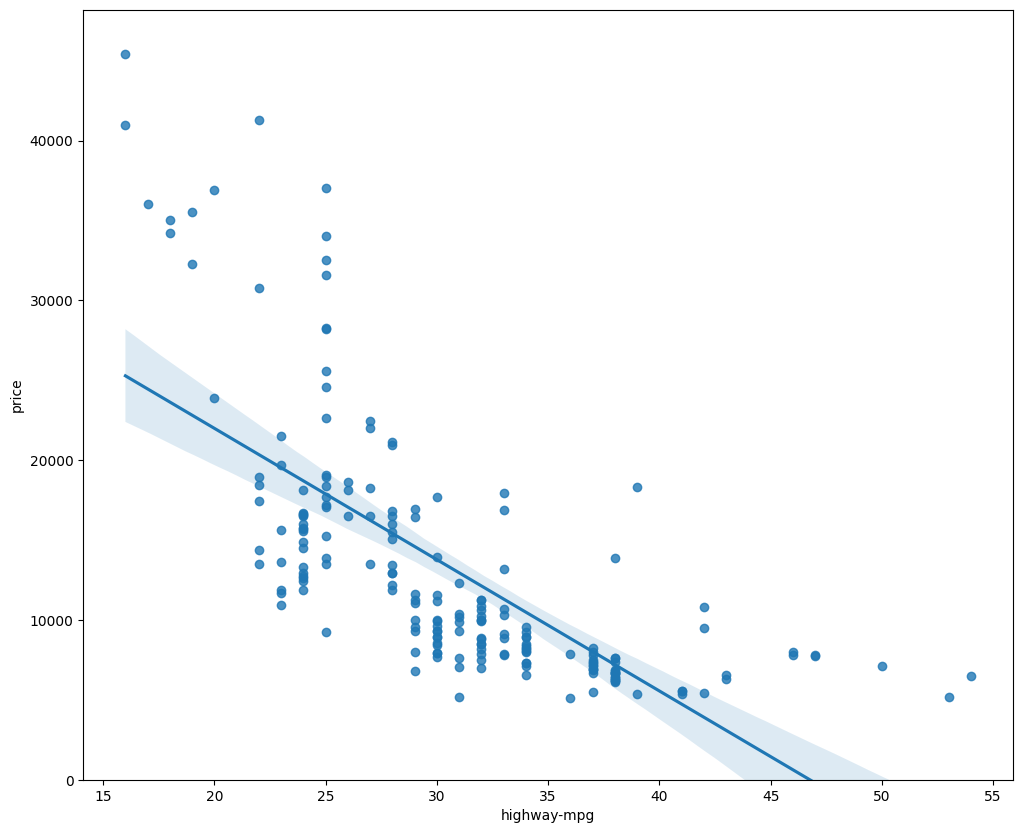

In [61]:
width = 12
height = 10

plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

(0.0, 47414.1)

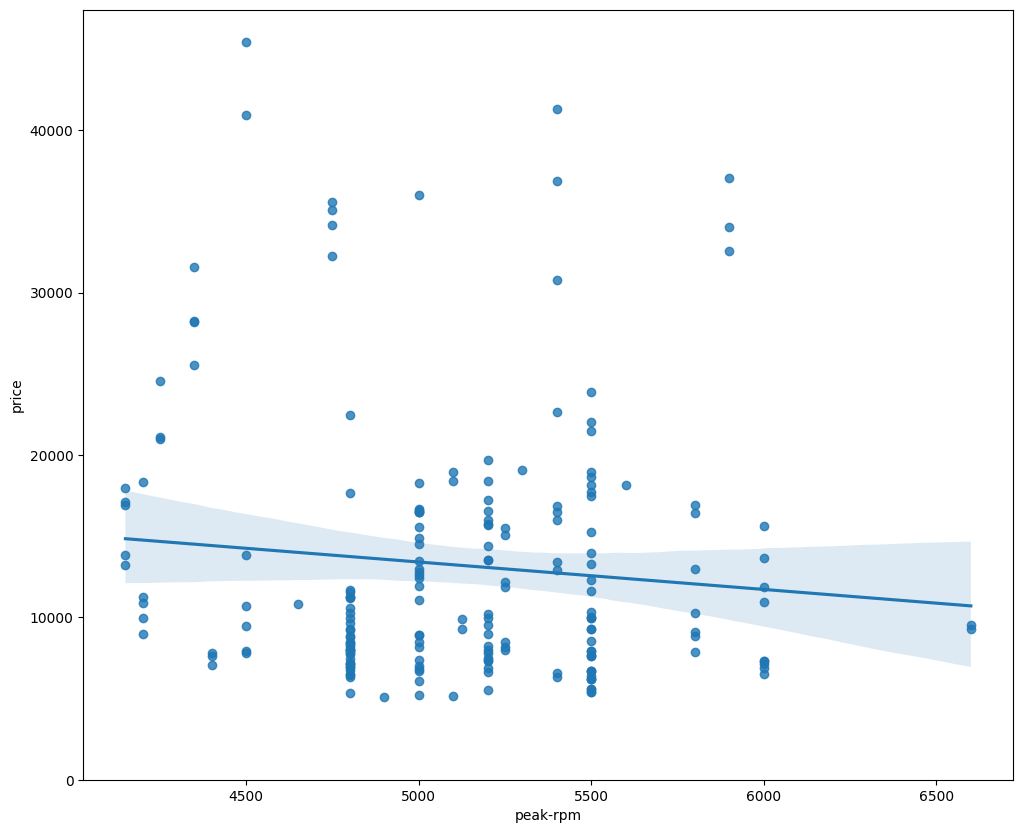

In [62]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [63]:
df[['highway-mpg', 'peak-rpm', 'price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


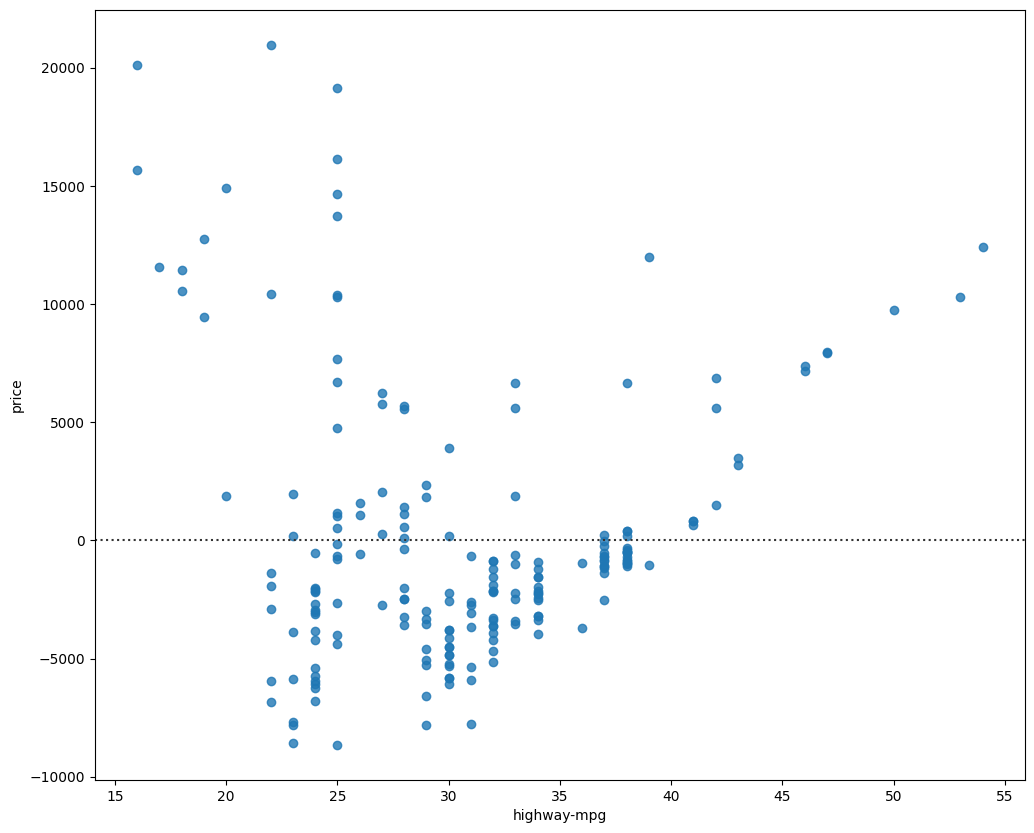

In [64]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [65]:
yhat = lm.predict(z)

c:\Users\HARIS\anaconda3\envs\NewEnv01\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<Figure size 1200x1000 with 0 Axes>

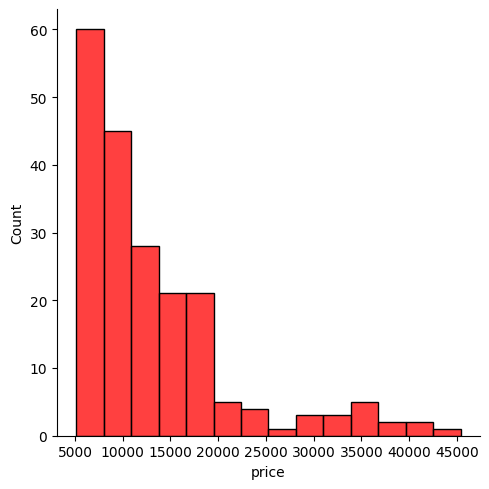

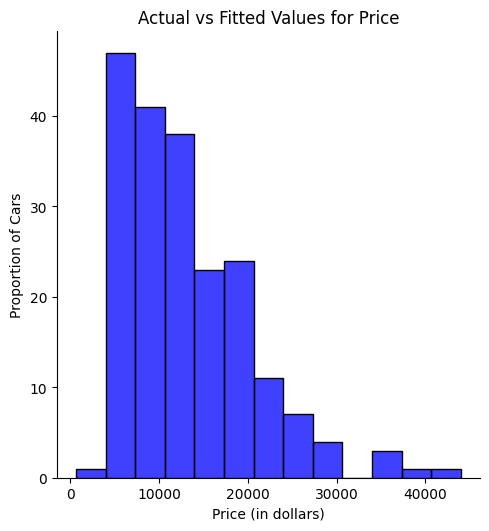

In [70]:
plt.figure(figsize=(width, height))

ax1 = sns.displot(df['price'],  color="r", label="Actual Value")
sns.displot(yhat,  color="b", label="Fitted Values", ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [84]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit with Matplotlib for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [72]:
x = df['highway-mpg']
y = df['price']

In [73]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


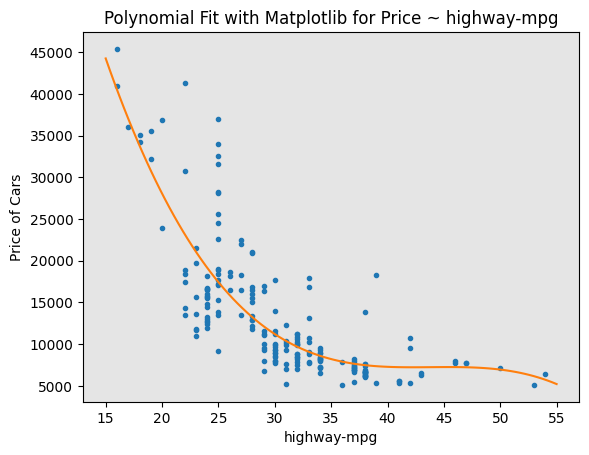

In [85]:
PlotPolly(p, x, y, 'highway-mpg')

In [76]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


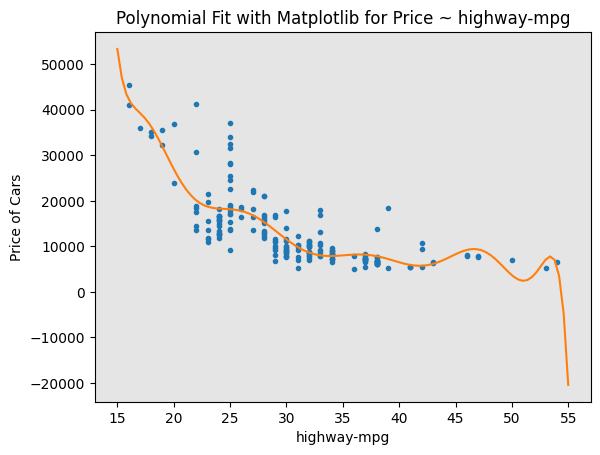

In [86]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x, y, 'highway-mpg')

In [88]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [89]:
z_pr = pr.fit_transform(z)

In [90]:
z.shape

(201, 4)

In [91]:
z_pr.shape

(201, 15)

In [93]:
input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(
    include_bias=False)), ('model', LinearRegression())]

In [94]:
pipe = Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [95]:
z = z.astype(float)
pipe.fit(z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [96]:
ypipe = pipe.predict(z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [97]:
input = [('scale', StandardScaler()), ('model', LinearRegression())]
pipe = Pipeline(input)

pipe.fit(z, y)

ypipe = pipe.predict(z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [103]:
lm.fit(x1, y1)
print('The R-square is: ', lm.score(x1, y1))

The R-square is:  0.7609686443622008


In [105]:
yhat = lm.predict(x1)
print(f"The output of the first four predicted values is {yhat[0:4]}")

The output of the first four predicted values is [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


In [107]:
mse = mean_squared_error(df['price'], yhat)
print(f"The mean squared error of price and predicted value is {mse}")

The mean squared error of price and predicted value is 15021126.02517414


In [108]:
lm.fit(z, df['price'])
print(f"the R-squared is {lm.score(z,df['price'])}")

the R-squared is 0.8093562806577458


In [109]:
y_predict_multifit = lm.predict(z)

In [111]:
print('The mean square error of price and predicted value using multifit is: ',
      mean_squared_error(df['price'], y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.870726489


In [114]:
r_squared = r2_score(y, p(x))
print(f'The r-Squared value is {r_squared}')

The r-Squared value is 0.6741946663906513


In [115]:
mean_squared_error(df['price'], p(x))

20474146.42636125

In [117]:
new_input = np.arange(1, 100, 1).reshape(-1, 1)

In [125]:
lm.fit(x1, y1)
lm

LinearRegression()

In [126]:
yhat = lm.predict(new_input)
yhat[0:4]

c:\Users\HARIS\anaconda3\envs\NewEnv01\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352])

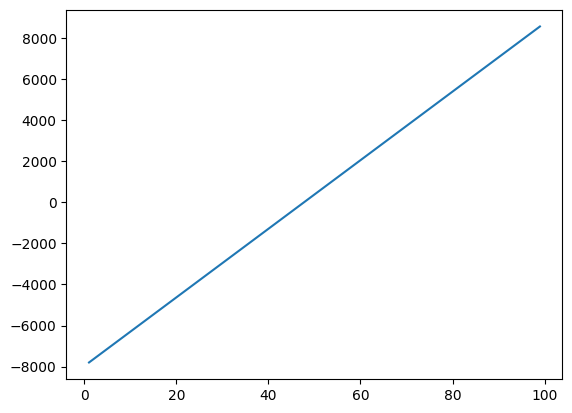

In [122]:
plt.plot(new_input, yhat)
plt.show()